# An Introduction to Market Basket Analysis
Data taken from [Kaggle](https://www.kaggle.com/shazadudwadia/supermarket). I picked this dataset because I wanted to gain experience applying Market Basket Analysis with a small dataset. Market Basket Analysis is a data mining technique and rule-based algorithm that can learn through relationships and can be utilized within ecommerce and marketing strategies. Through this analysis we can make smarter decisions that will benefit the consumer. For example, Market Basket Analysis helps provide insights that allows us to determine where to place items in a store, or if a customer purchases one item we might consider targeting them with advertisements with another item. With MBA we can determine how to consider more advantageous group discounts, and even go one step further in developing a recommmendor system for ecommerce shoppers.

Links for Reference: \
https://towardsdatascience.com/mba-for-breakfast-4c18164ef82b \
https://www.youtube.com/watch?v=WGlMlS_Yydk&t=8s \
https://towardsdatascience.com/association-rules-2-aa9a77241654 \
https://towardsdatascience.com/complete-guide-to-association-rules-2-2-c92072b56c84


In [3]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib as pl

# Import mlxtend packages
from mlxtend.preprocessing import TransactionEncoder
import itertools  

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [20]:
# Import as dataframe
df = pd.read_csv('MarketBasketAnalysis/GroceryStoreDataSet.csv', header = None)

In [21]:
# View first 5 rows of dataframe
df.head()

,0
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


#### Step 1
In order to run the market basket analysis, we must first start with a list of transactions: 
    
    Transaction 1: 'Apple', 'Beer', 'Rice', 'Chicken'
    Transaction 2: 'Apple', 'Beer', 'Rice' 
    Transaction 3: 'Apple', 'Beer'
    Transaction 4: 'Apple', 'Bananas'
    Transaction 5: 'Milk', 'Beer', 'Rice', 'Chicken'
    Transaction 6: 'Milk', 'Beer', 'Rice'
    Transaction 7: 'Milk', 'Beer'
    Transaction 8: 'Apple', 'Bananas'

    dataset = [['Apple', 'Beer', 'Rice', 'Chicken'], 
           ['Apple', 'Beer', 'Rice'], 
           ['Apple', 'Beer'], 
           ['Apple', 'Bananas'], 
           ['Milk', 'Beer', 'Rice', 'Chicken'], 
           ['Milk', 'Beer', 'Rice'], 
           ['Milk', 'Beer'], 
           ['Apple', 'Bananas']]
 
#### Step 2:
Next use [TransactionEncoder](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/) to transform the list of transactional items into dummy variables which is suitable for computating text data such as in Machine Learning and Statistical Analysis methods.

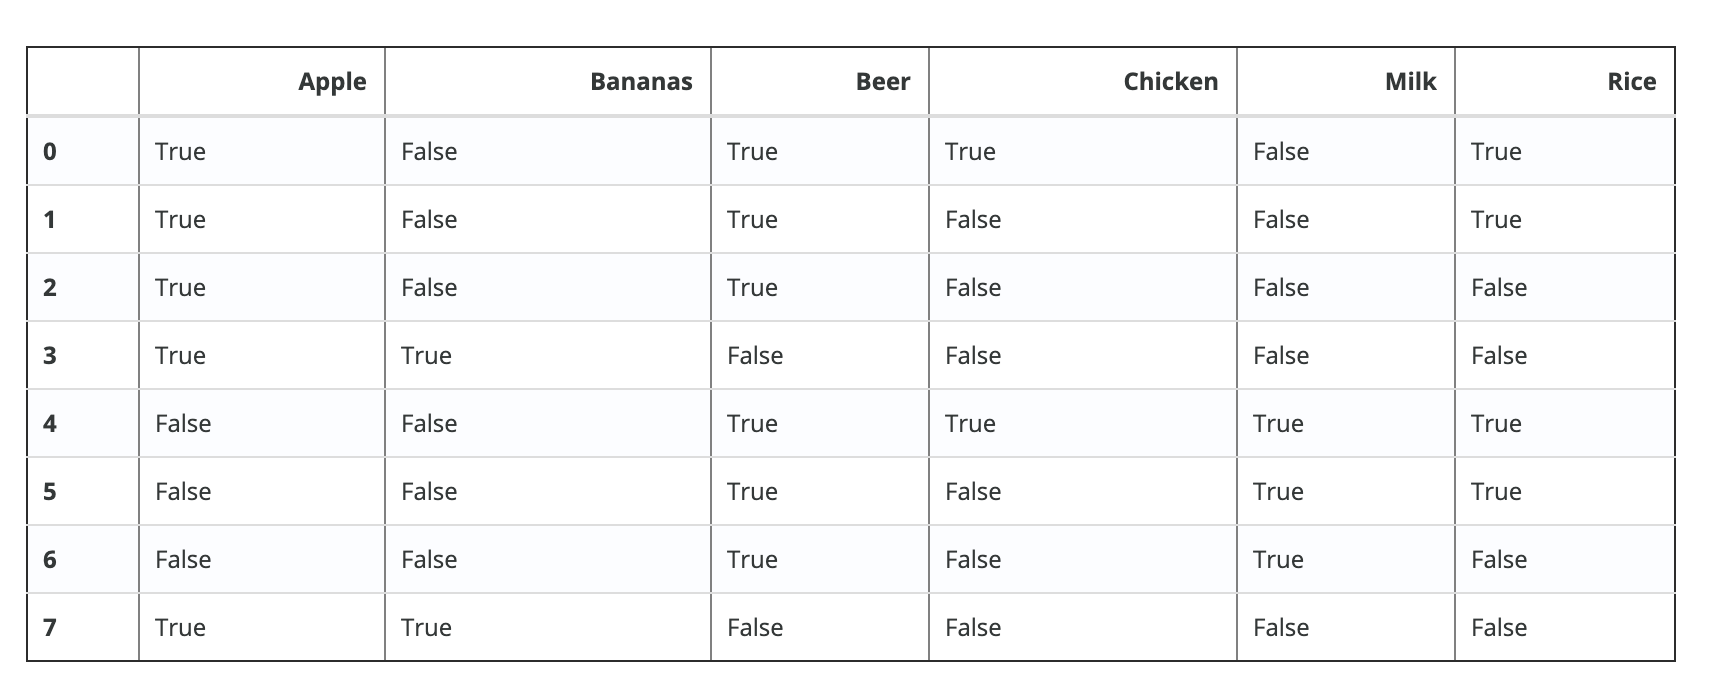

#### Step 3:
Once the dataframe is setup correctly, we can run Aipori Algorithm which is an association rule algorithm. Association Rules ["help uncover all such relationships between items from huge databases".](https://towardsdatascience.com/association-rules-2-aa9a77241654)

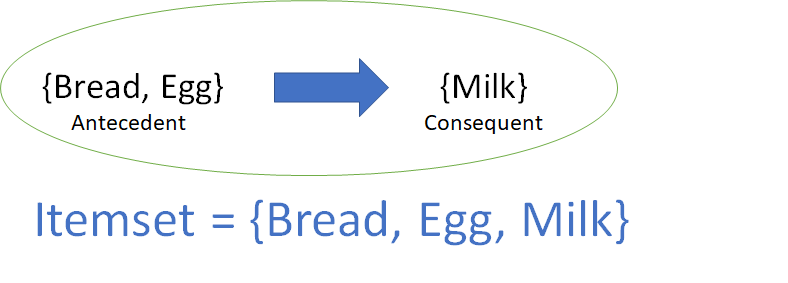


#### Step 4: 
Create a recommendor system

### Step 1: Transform dataframe into a list

In [6]:
# Make dataframe into a list, where each list of items is a transaction:
# Transaction 1: Milk, Bread, Biscuit
# Transaction 2: Bread, Milk, Biscuit, Cornflakes
# Transaction 3: Bread, Tea, Bournvita

basket = []

df.values[0, 0].split(',')

for i in range(len(df)):
    basket.append(df.values[i, 0].split(','))

In [7]:
# View basket
basket

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

### Step 2: Transform input dataset into a one-hot encoded NumPy boolean array

In [45]:
# Instantiate
te = TransactionEncoder()

# Fit and Transform the data into True and False (1 and 0)
item = te.fit(basket).transform(basket)

# View items after transforming as boolean array
item[0:5]

array([[ True, False,  True, False, False, False, False, False,  True,
        False, False],
       [ True, False,  True, False, False,  True, False, False,  True,
        False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True],
       [False, False,  True, False, False, False,  True,  True,  True,
        False, False],
       [ True, False, False, False, False, False, False,  True, False,
        False,  True]])

In [46]:
# Can also transform array from boolean to integer for when working with large datasets
item.astype("int")[0:5]

array([[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]])

In [47]:
# Create DataFrame
df = pd.DataFrame(item, columns = te.columns_)
df.head()

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True


### Step 3: Aipori Algorithm

In [108]:
frequent_itemsets = apriori(df, min_support = 0.005, use_colnames=True)

In [109]:
frequent_itemsets

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
...,...,...
78,0.05,"(BREAD, BISCUIT, TEA, MAGGI)"
79,0.10,"(COCK, CORNFLAKES, BISCUIT, COFFEE)"
80,0.05,"(BREAD, MILK, JAM, MAGGI)"
81,0.05,"(BREAD, JAM, TEA, MAGGI)"


In [110]:
# add 
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.15,(COCK),1
4,0.40,(COFFEE),1
...,...,...,...
78,0.05,"(BREAD, BISCUIT, TEA, MAGGI)",4
79,0.10,"(COCK, CORNFLAKES, BISCUIT, COFFEE)",4
80,0.05,"(BREAD, MILK, JAM, MAGGI)",4
81,0.05,"(BREAD, JAM, TEA, MAGGI)",4


In [111]:
# getting th item sets with length = 2 and support more than 5%

items = frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

In [112]:
items

,support,itemsets,length
11,0.20,"(BREAD, BISCUIT)",2
12,0.10,"(COCK, BISCUIT)",2
13,0.10,"(BISCUIT, COFFEE)",2
14,0.15,"(CORNFLAKES, BISCUIT)",2
15,0.10,"(BISCUIT, MAGGI)",2
16,0.10,"(MILK, BISCUIT)",2
17,0.05,"(SUGER, BISCUIT)",2
18,0.10,"(BISCUIT, TEA)",2
19,0.15,"(BREAD, BOURNVITA)",2
20,0.05,"(BOURNVITA, COFFEE)",2


In [113]:
basket = [list(x) for x in items['itemsets']]

In [114]:
basket

[['BREAD', 'BISCUIT'],
 ['COCK', 'BISCUIT'],
 ['BISCUIT', 'COFFEE'],
 ['CORNFLAKES', 'BISCUIT'],
 ['BISCUIT', 'MAGGI'],
 ['MILK', 'BISCUIT'],
 ['SUGER', 'BISCUIT'],
 ['BISCUIT', 'TEA'],
 ['BREAD', 'BOURNVITA'],
 ['BOURNVITA', 'COFFEE'],
 ['SUGER', 'BOURNVITA'],
 ['BOURNVITA', 'TEA'],
 ['BREAD', 'COCK'],
 ['BREAD', 'COFFEE'],
 ['BREAD', 'CORNFLAKES'],
 ['BREAD', 'JAM'],
 ['BREAD', 'MAGGI'],
 ['BREAD', 'MILK'],
 ['BREAD', 'SUGER'],
 ['BREAD', 'TEA'],
 ['COCK', 'COFFEE'],
 ['COCK', 'CORNFLAKES'],
 ['CORNFLAKES', 'COFFEE'],
 ['MILK', 'COFFEE'],
 ['SUGER', 'COFFEE'],
 ['COFFEE', 'TEA'],
 ['CORNFLAKES', 'MAGGI'],
 ['MILK', 'CORNFLAKES'],
 ['SUGER', 'CORNFLAKES'],
 ['CORNFLAKES', 'TEA'],
 ['JAM', 'MAGGI'],
 ['MILK', 'JAM'],
 ['JAM', 'TEA'],
 ['MILK', 'MAGGI'],
 ['TEA', 'MAGGI'],
 ['MILK', 'TEA']]

In [ ]:
# Instantiate
te = TransactionEncoder()

# Fit and Transform
item = te.fit(basket).transform(basket)

#Turn the encoded array into a DataFrame
df = pd.DataFrame(item.astype("int"), columns=te.columns_)
df.head()

In [116]:
x = apriori(df, min_support=0.005, use_colnames=True)

In [117]:
#take a look at the help for ways we can use this function
association_rules = association_rules(x, metric="lift", min_threshold=1)

In [118]:
association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(COCK),(BISCUIT),0.111111,0.222222,0.027778,0.250000,1.125000,0.003086,1.037037
1,(BISCUIT),(COCK),0.222222,0.111111,0.027778,0.125000,1.125000,0.003086,1.015873
2,(BOURNVITA),(COFFEE),0.111111,0.222222,0.027778,0.250000,1.125000,0.003086,1.037037
3,(COFFEE),(BOURNVITA),0.222222,0.111111,0.027778,0.125000,1.125000,0.003086,1.015873
4,(SUGER),(BOURNVITA),0.138889,0.111111,0.027778,0.200000,1.800000,0.012346,1.111111
5,(BOURNVITA),(SUGER),0.111111,0.138889,0.027778,0.250000,1.800000,0.012346,1.148148
6,(BOURNVITA),(TEA),0.111111,0.222222,0.027778,0.250000,1.125000,0.003086,1.037037
7,(TEA),(BOURNVITA),0.222222,0.111111,0.027778,0.125000,1.125000,0.003086,1.015873
8,(COCK),(COFFEE),0.111111,0.222222,0.027778,0.250000,1.125000,0.003086,1.037037
9,(COFFEE),(COCK),0.222222,0.111111,0.027778,0.125000,1.125000,0.003086,1.015873


In [133]:
top_rated = association_rules[association_rules['antecedents'] == frozenset({'COFFEE'})].sort_values(by=['lift'], ascending=False)

In [134]:
top_rated

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(COFFEE),(BOURNVITA),0.222222,0.111111,0.027778,0.125,1.125,0.003086,1.015873
9,(COFFEE),(COCK),0.222222,0.111111,0.027778,0.125,1.125,0.003086,1.015873


### Step 4: Recommendor System

In [152]:
def recommendation(item):
    
    """
    A function that takes in a item and returns the top 2 items are recommended to purchase with this product
    
    Input: Item (string)
    Output: Top 2 recommended products
    
    """
    
    # where antecedents = item i.e. COFFEE, sort table by lift in ascending order
    top_rated = association_rules[association_rules['antecedents'] == frozenset({item})].sort_values(by=['lift'], ascending=False)
    
    # Create empty list for Products
    product = []

    # Create a table that lists the consequents from top_rated
    for i in np.arange(0, len(top_rated), 1):
        
        # Append product ID for consquents results 
        product.append(list(top_rated['consequents'].iloc[i]))

    #Create a dataframe with consequents Product
    product = pd.DataFrame(product, columns=['product recommendation'])
    
    # Return the top 2 from consequents product from the list
    
    return product.head(2)

In [158]:
recommendation('COFFEE')

,product recommendation
0,BOURNVITA
1,COCK
